**WATER QUALITY ANALYSIS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns


In [2]:
data=pd.read_csv("water_potability.csv")

In [3]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [5]:
#Replacing null values with average
sulf_avg=data['Sulfate'].mean()
data['Sulfate']=data['Sulfate'].fillna(sulf_avg)

ph_avg=data['ph'].mean()
data['ph']=data['ph'].fillna(ph_avg)

Trihalomethanes_avg=data['Trihalomethanes'].mean()
data['Trihalomethanes']=data['Trihalomethanes'].fillna(Trihalomethanes_avg)

In [6]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
data.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


In [8]:
#Splitting dataset into testing and training sets
x=data[data.columns[0:9]].to_numpy()
y=data['Potability']

x_train, x_test, y_train, y_test = train_test_split(
	x, y, test_size=0.05, random_state=0)

**LOGISTIC REGRESSION**

In [9]:
lm=linear_model.LogisticRegression()
model=lm.fit(x_train,y_train)

C:\Users\bhavn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
model.score(x,y)

0.6098901098901099

Accuracy of log regression: 60.9%

In [11]:
predicted=model.predict(x_test)

**Random forest classifier**

              precision    recall  f1-score   support

           0       0.69      0.94      0.80       105
           1       0.71      0.25      0.38        59

    accuracy                           0.70       164
   macro avg       0.70      0.60      0.59       164
weighted avg       0.70      0.70      0.65       164

None


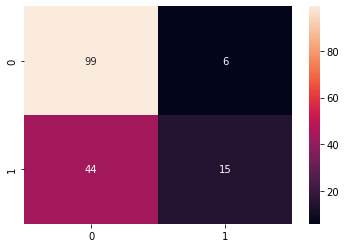

In [12]:
Rfc=RandomForestClassifier()
Rfc.fit(x_train,y_train)
y_rfc=Rfc.predict(x_test)
modelAccuracy=list()
print(metrics.classification_report(y_test,y_rfc))
print(modelAccuracy.append(metrics.accuracy_score(y_test,y_rfc)))

sns.heatmap(confusion_matrix(y_test,y_rfc),annot=True,fmt='d')
plt.show()

accuracy of random forest classifer: 68%

**DECISION TREE CLASSIFIER**

In [13]:
dtc=DecisionTreeClassifier()
model3=dtc.fit(x_train,y_train)
pred=model3.predict(x_test)

In [14]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.573170731707317


Accuracy of Decision Tree Classifier: 57.9%

**Hence we observe that, Random Forest Classifier is the best algorithm for water quality analysis**